# Data Loading

Load the data from the library


In [74]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
# import plotly.graph_objs as go
# import plotly
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from collections import Counter
# import plotly.graph_objects as go
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
# import plotly.graph_objs as go
# import plotly
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from collections import Counter
# import plotly.graph_objects as go
import matplotlib.pyplot as plt




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
from preprocessing import dataloader

In [76]:
PHMSA = dataloader()

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value 

In [81]:
X = PHMSA.X
y = PHMSA.y
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=123)



# Cost Prediction

Predict the Cost


In [92]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE}
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [93]:
# Random Forest on Cost Prediction

max_depth=[2,4,8,16,32,64]
ntrees = [4,8,16,32]
max_features = [0.1,0.2,0.3,0.5,0.9]

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=RandomForestClassifier(random_state = 123,class_weight='balanced'),
    param_grid={'max_depth':max_depth, 'n_estimators':ntrees,'max_features':max_features},
    scoring='f1',
    cv=5
)

grid_result = gsc.fit(X_train,y_train['TOTAL_COST'])
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'max_depth': 2, 'max_features': 0.2, 'n_estimators': 32}


In [94]:
# Prediction"
y_pred = grid_result.predict(X_test)
y_pred_rfCOST = y_pred
y_true = y_test['TOTAL_COST']

print(metrics.classification_report(y_true,y_pred))
print('Accuracy:',metrics.accuracy_score(y_true,y_pred))
print(metrics.confusion_matrix(y_true,y_pred))


              precision    recall  f1-score   support

           0       0.67      0.68      0.67       179
           1       0.72      0.71      0.71       207

    accuracy                           0.69       386
   macro avg       0.69      0.69      0.69       386
weighted avg       0.69      0.69      0.69       386

Accuracy: 0.694300518134715
[[121  58]
 [ 60 147]]


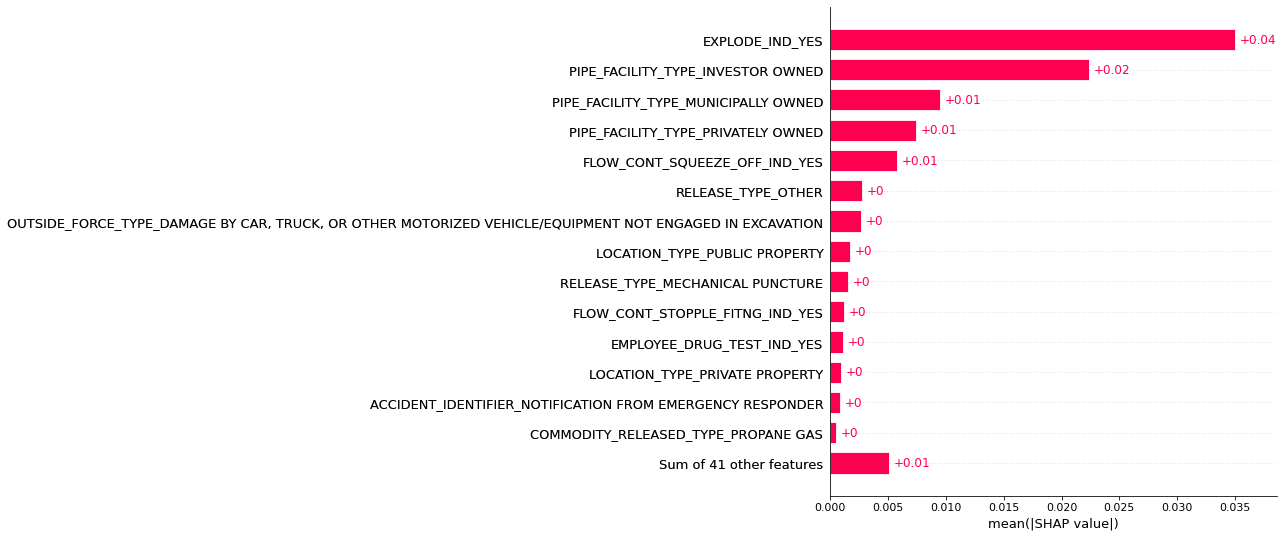

In [99]:
import shap
explainer = shap.Explainer(gsc.best_estimator_)
shap_values = explainer(X_test)

shap.plots.bar(shap_values[:,:,1],max_display=15)

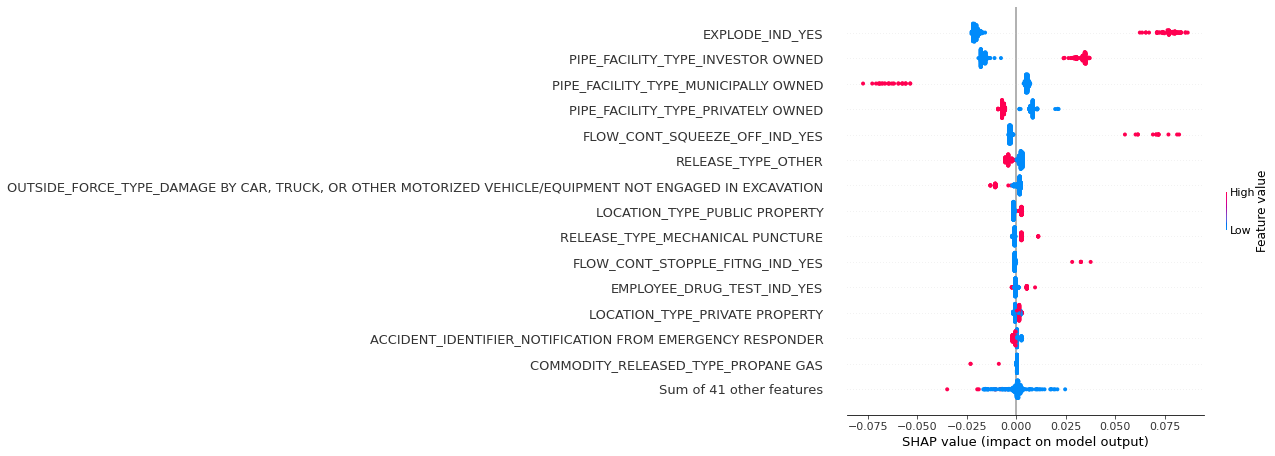

In [100]:
shap.plots.beeswarm(shap_values[:,:,1],max_display=15)

# Injury Prediction


In [101]:
# Random Forest

max_depth=[8,16,32,64]
max_features = [0.3,0.5,0.9]

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=RandomForestClassifier(random_state = 123,class_weight='balanced'),
    param_grid={'max_depth':max_depth, 'n_estimators':ntrees,'max_features':max_features},
    scoring='f1',
    cv=5
)



# oversample = SMOTE()
# inp, out = oversample.fit_resample(X_train,y_train['INJURE_BOOL'])

grid_result = gsc.fit(X_train,y_train['INJURE_BOOL'])
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'max_depth': 8, 'max_features': 0.3, 'n_estimators': 32}


In [104]:
# Prediction"
y_pred = grid_result.predict(X_test)
y_pred_rfCOST = y_pred
y_true = y_test['INJURE_BOOL']

print(metrics.classification_report(y_true,y_pred))
print('Accuracy:',metrics.accuracy_score(y_true,y_pred))
print(metrics.confusion_matrix(y_true,y_pred))



              precision    recall  f1-score   support

           0       0.90      0.79      0.84       307
           1       0.44      0.65      0.53        79

    accuracy                           0.76       386
   macro avg       0.67      0.72      0.68       386
weighted avg       0.80      0.76      0.78       386

Accuracy: 0.7616580310880829
[[243  64]
 [ 28  51]]


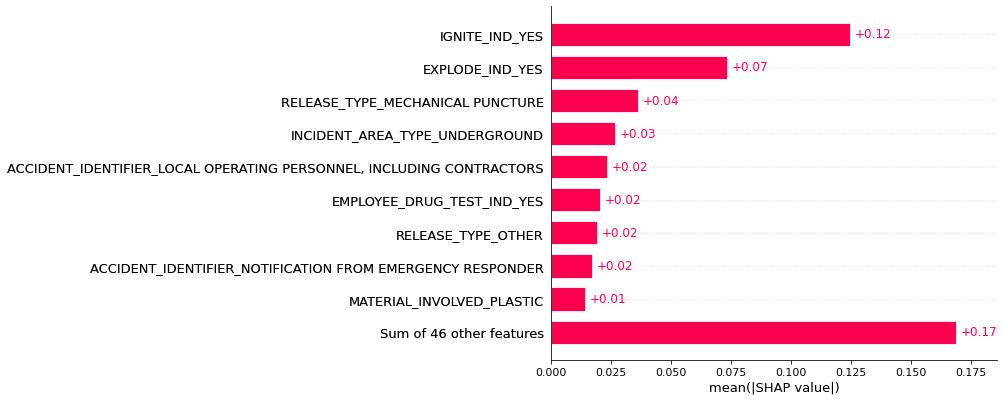

In [105]:
import shap
explainer = shap.Explainer(gsc.best_estimator_)
shap_values = explainer(X_test)

shap.plots.bar(shap_values[:,:,1], )

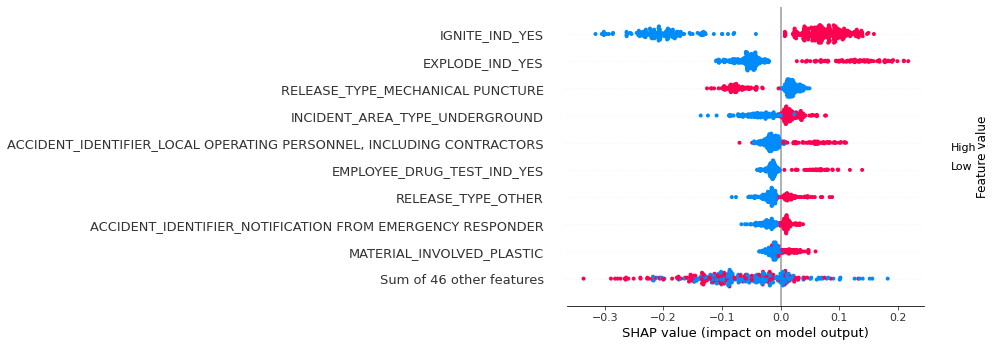

In [106]:
shap.plots.beeswarm(shap_values[:,:,1])

# Fatalities Prediction


In [108]:
# Random Forest

max_depth=[2,4,8,16,32,64]
ntrees = [4,8,16,32]
max_features = [0.1,0.2,0.3,0.5,0.9]

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=RandomForestClassifier(random_state = 123,class_weight='balanced'),
    param_grid={'max_depth':max_depth, 'n_estimators':ntrees,'max_features':max_features},
    scoring='f1',
    cv=5
)



# oversample = SMOTE()
# inp, out = oversample.fit_resample(X_train,y_train['FATAL_BOOL'])

grid_result = gsc.fit(X_train,y_train['FATAL_BOOL'])
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'max_depth': 8, 'max_features': 0.9, 'n_estimators': 4}


In [109]:
y_pred = grid_result.predict(X_test)
y_pred_rfFAT = y_pred
print(metrics.classification_report(y_test['FATAL_BOOL'],y_pred))
print('Accuracy:',metrics.accuracy_score(y_test['FATAL_BOOL'],y_pred))
print(metrics.confusion_matrix(y_test['FATAL_BOOL'],y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       361
           1       0.14      0.20      0.17        25

    accuracy                           0.87       386
   macro avg       0.54      0.56      0.55       386
weighted avg       0.89      0.87      0.88       386

Accuracy: 0.8704663212435233
[[331  30]
 [ 20   5]]


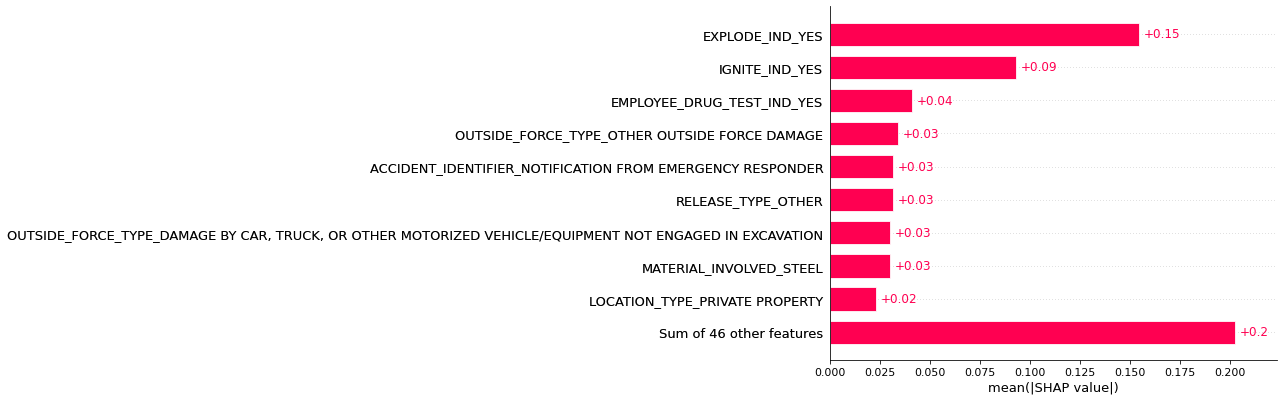

In [110]:
import shap
explainer = shap.Explainer(gsc.best_estimator_)
shap_values = explainer(X_test)

shap.plots.bar(shap_values[:,:,1])

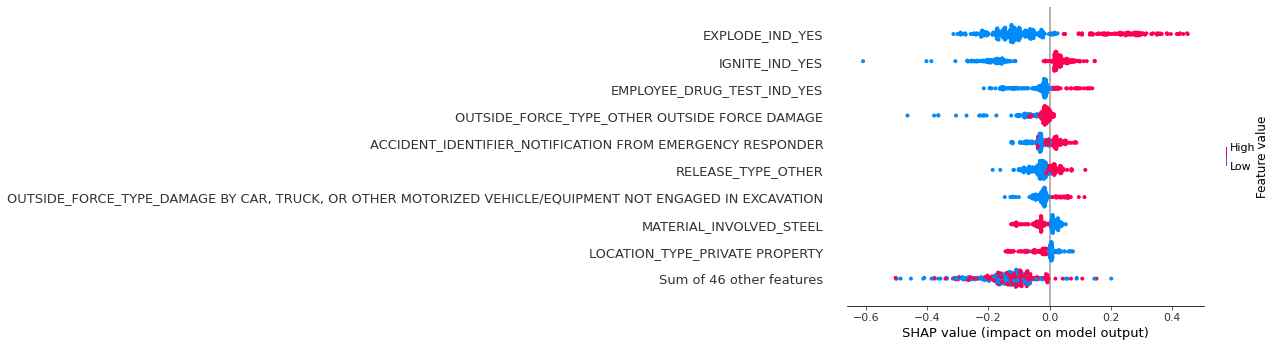

In [112]:
shap.plots.beeswarm(shap_values[:,:,1])